In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\users\rendo\08-2020 Instacart Basket Analysis'

In [9]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','order_prods_all_updated.pkl'))

In [11]:
# Check on the imported data
ords_prods_all.shape

(30629741, 33)

In [10]:
ords_prods_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer


In [12]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629741 entries, 0 to 30629740
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   first                   object 
 2   last                    object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   marital_status          object 
 9   income                  int64  
 10  order_id                int64  
 11  order_number            int64  
 12  orders_day_of_week      int64  
 13  hour_of_day             int64  
 14  days_since_prior_order  float64
 15  product_id              int64  
 16  add_to_cart_order       int64  
 17  reordered               int64  
 18  product_name            object 
 19  aisle_id                int64  
 20  department_id           int64  
 21  prices                  float

In [7]:
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [8]:
# Check on the imported data
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# Step 2
## Security implications
need to alter or omit PII such as names in the dataset to protect customers

# Step 3

In [15]:
ords_prods_all['state'].value_counts(dropna = False)

state
California              630308
Pennsylvania            629833
Rhode Island            621341
Georgia                 620618
Arizona                 619810
North Carolina          618268
Oklahoma                615354
Minnesota               613699
New Mexico              611481
Maine                   610309
Alaska                  610279
Wyoming                 609764
Massachusetts           608964
Arkansas                608035
Mississippi             607362
Texas                   605608
North Dakota            605317
Nevada                  605083
Missouri                604383
Virginia                603563
South Dakota            602744
Kansas                  602396
Louisiana               602384
Alabama                 602310
South Carolina          602049
New York                601409
Washington              601352
Montana                 600639
Michigan                600593
Kentucky                600323
Colorado                599764
Oregon                  599340
De

In [24]:
# Create new column for region, using 'If-Statements with For-Loops'
result =[]

for value in ords_prods_all['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append('West')
    else:
        result.append('Unknown')

In [27]:
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [28]:
# Create new column from result output
ords_prods_all['region'] = result

In [29]:
# Check accurate regional segmentation
ords_prods_all['region'].value_counts (dropna = False)

region
South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: count, dtype: int64

In [30]:
# Check on the dataframe
ords_prods_all.shape

(30629741, 34)

In [31]:
ords_prods_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest


In [23]:
print(ords_prods_all['spending_flag'])

0           Low spender
1           Low spender
2           Low spender
3           Low spender
4           Low spender
               ...     
30629736    Low spender
30629737    Low spender
30629738    Low spender
30629739    Low spender
30629740    Low spender
Name: spending_flag, Length: 30629741, dtype: object


In [32]:
regional_spending_habits = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [33]:
regional_spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,28489,7148435
Northeast,17292,5404733
South,38765,10160217
West,29555,7802255


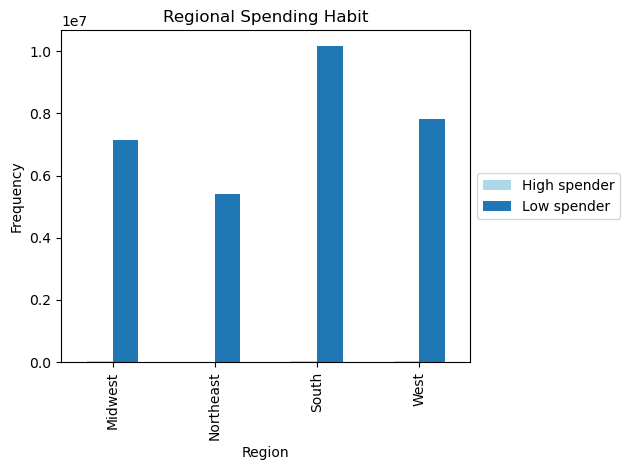

In [34]:
# Create a bar chart of the above 'regional_spending_habits' crosstab

bar_regional_spending_habit=regional_spending_habits.plot.bar(color=['lightblue','tab:blue'])
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Regional Spending Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters

##### by looking at spending habits we can see low spenders go with the total number of customers per region ranked as south, west, midwest, and northeast. nothing notable across high spenders.

In [35]:
# Export the chart
bar_regional_spending_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_spending_habit.png'))

# Step 4

In [36]:
# Deriving columns with loc()
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'customer_activity'] = 'active_customer'

In [37]:
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'customer_activity'] = 'non_active_customer'

In [38]:
# Cross-check the result
ords_prods_all['customer_activity'].value_counts(dropna = False)

customer_activity
active_customer        29270938
non_active_customer     1358803
Name: count, dtype: int64

#### check works. active and non active = 30629741

In [39]:
# Create a subset for the active customers

ords_prods_active_customers = ords_prods_all[ords_prods_all['customer_activity']=='active_customer']

In [40]:
ords_prods_active_customers.shape

(29270938, 35)

In [41]:
ords_prods_active_customers.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer


In [42]:
# Export the 'active_customer' subset

ords_prods_active_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_active_customers.pkl'))

# Step 5

In [43]:
# Deriving columns with loc(), create a flag 'age group'
ords_prods_all.loc[ords_prods_all['age'] < 40, 'age_group'] = 'Under 40'

In [44]:
ords_prods_all.loc[(ords_prods_all['age'] >= 40) & (ords_prods_all['age'] < 65),'age_group']= 'Middle Age'

In [45]:
ords_prods_all.loc[ords_prods_all['age'] >= 65, 'age_group'] = 'Seniors'

In [46]:
# Cross-check the result
ords_prods_all['age_group'].value_counts(dropna=False)

age_group
Middle Age    11986510
Under 40      10545660
Seniors        8097571
Name: count, dtype: int64

#### check works. age groups equal 30629741

In [55]:
# Define the intervals of the groups
ords_prods_all['marital_status'].value_counts(dropna=False)

marital_status
married                             21509211
single                               5019732
divorced/widowed                     2629966
living with parents and siblings     1470832
Name: count, dtype: int64

In [56]:
ords_prods_all['marital_status'].describe()

count     30629741
unique           4
top        married
freq      21509211
Name: marital_status, dtype: object

In [58]:
ords_prods_all['number_of_dependants'].value_counts(dropna=False)

number_of_dependants
3    7680036
2    7656940
0    7649698
1    7643067
Name: count, dtype: int64

In [59]:
# Define the intervals of the groups
ords_prods_all['number_of_dependants'].describe()

count    3.062974e+07
mean     1.501712e+00
std      1.118467e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

In [60]:
# Deriving columns with loc(), create a flag 'family status'
ords_prods_all.loc[(ords_prods_all['marital_status'].isin(['divorced/widowed','single', 'living with parents and siblings']))&(ords_prods_all['number_of_dependants'] == 0),'family_status_flag']= 'Single adult'

In [61]:
ords_prods_all.loc[(ords_prods_all['marital_status'].isin(['living with parents and siblings']))&(ords_prods_all['number_of_dependants'] > 0),'family_status_flag']= 'Young parent'

In [63]:
ords_prods_all.loc[(ords_prods_all['marital_status'].isin(['divorced/widowed','single']))&(ords_prods_all['number_of_dependants'] > 0),'family_status_flag']= 'Single adult with children'

In [64]:
ords_prods_all.loc[(ords_prods_all['marital_status'].isin(['married']))&(ords_prods_all['number_of_dependants'] > 0),'family_status_flag']= 'Family'

In [65]:
ords_prods_all.loc[(ords_prods_all['marital_status'].isin(['married']))&(ords_prods_all['number_of_dependants'] == 0),'family_status_flag']= 'Family without children'

In [66]:
# Cross-check the result
ords_prods_all['family_status_flag'].value_counts(dropna=False)

family_status_flag
Family          21509211
Single adult     7649698
Young parent     1470832
Name: count, dtype: int64

### cross check verified. status flag = 30629741

In [67]:
# Merge 'ords_prods_all' and 'departments' using department_id as a key 
df_instacart_all = ords_prods_all.merge(departments, on = 'department_id')

In [68]:
df_instacart_all.shape

(30629741, 38)

In [69]:
df_instacart_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,family_status_flag,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer,Middle Age,Family,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer,Middle Age,Family,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,New customer,7.99,Low spender,19.0,Regular customer,Midwest,active_customer,Middle Age,Family,beverages
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,26.0,Non-frequent customer,West,active_customer,Under 40,Single adult,beverages
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,26.0,Non-frequent customer,West,active_customer,Under 40,Single adult,beverages


In [70]:
# Use the indicator argument to check whether there was a full match between the two dataframes
df_instacart_all_test = ords_prods_all.merge(departments, on = 'department_id', indicator = True)

In [71]:
df_instacart_all_test['_merge'].value_counts()

_merge
both          30629741
left_only            0
right_only           0
Name: count, dtype: int64

In [72]:
# Merge 'ords_prods_all' and 'departments' using department_id as a key  & the argument how = 'outer', to double-check the full match 
df_instacart_all_test_1 = ords_prods_all.merge(departments, on = 'department_id', indicator = True, how = 'outer')

In [73]:
# Use the indicator argument to check whether there was a full match between the two dataframes
df_instacart_all_test_1['_merge'].value_counts()

_merge
both          30629741
left_only            0
right_only           0
Name: count, dtype: int64

### full match recognized

In [74]:
# Deriving columns with loc(), create a flag 'goods_sales_count'
df_instacart_all.loc[(df_instacart_all['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery'])),'goods_group']= 'Grocery Essentials'

In [75]:
df_instacart_all.loc[(df_instacart_all['department'].isin(['canned goods', 'deli', 'dry goods pasta', 'household', 'meat seafood', 'breakfast', 'personal care', 'babies', 'international', 'alcohol', 'pets', 'other' ])),'goods_group']= 'Non-Grocery Items'

In [76]:
df_instacart_all.loc[(df_instacart_all['department'].isin(['bulk', 'missing'])),'goods_group']= 'Not Specified'

In [77]:
# Cross-check the result
df_instacart_all['goods_group'].value_counts(dropna=False)

goods_group
Grocery Essentials    24328092
Non-Grocery Items      6203626
Not Specified            98023
Name: count, dtype: int64

#### goods group equals both merge which is 30629741

In [78]:
# Define the intervals of the groups
df_instacart_all['department'].value_counts()

department
produce            8963496
dairy eggs         5101185
snacks             2730482
beverages          2540159
frozen             2113059
pantry             1771171
bakery             1108540
canned goods       1009660
deli                993564
dry goods pasta     819814
household           696686
meat seafood        671242
breakfast           663250
personal care       421568
babies              400378
international       254641
alcohol             146535
pets                 92253
missing              65411
other                34035
bulk                 32612
Name: count, dtype: int64

In [79]:
# Deriving columns with loc(), create a flag 'goods_sales_count'
df_instacart_all.loc[(df_instacart_all['department'].isin(['produce', 'dairy eggs'])),'goods_sales_count']= 'High Sales'

In [80]:
df_instacart_all.loc[(df_instacart_all['department'].isin(['snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli', 'dry goods pasta', 'household', 'meat seafood', 'breakfast', 'personal care', 'babies'])),'goods_sales_count']= 'Medium Sales'

In [81]:
df_instacart_all.loc[(df_instacart_all['department'].isin(['international', 'alcohol', 'pets', 'missing', 'other', 'bulk'])),'goods_sales_count']= 'Low Sales'

In [82]:
# Cross-check the result
df_instacart_all['goods_sales_count'].value_counts(dropna=False)

goods_sales_count
Medium Sales    15939573
High Sales      14064681
Low Sales         625487
Name: count, dtype: int64

#### cross check equals 30629741

In [83]:
df_instacart_all.shape

(30629741, 40)

In [84]:
# Droping the unnecessary columns from the final dataframe
instacart_all=df_instacart_all.drop(columns = ['add_to_cart_order', 'reordered','aisle_id' ])

In [85]:
instacart_all.shape

(30629741, 37)

In [86]:
# Export Final Data 
instacart_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_all.pkl'))